In [1]:
# Import data and libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
#from mpl_toolkits.basemap import Basemap
pylab.rcParams['figure.figsize'] = 16, 12
#pd.options.display.mpl_style = 'default'
#matplotlib.style.use('ggplot') # for pandas version 17
#get_ipython().magic(u'matplotlib inline')
import sys 
sys.path.append('../Bmore/2015')
import ibuttonplots
import importibuttondata
pylab.rcParams['font.family'] = 'serif' 
pylab.rcParams['font.size'] = 14
pylab.rcParams['axes.titlesize'] = 22

# ### Use this to read in reformated data 
# # read in temperature
# tempDF = pd.read_csv('NairobiSensors.csv', parse_dates = [0]).set_index('Date')
# tempDF.columns = tempDF.columns.astype(int)
# meta = pd.DataFrame(pd.read_csv('./data/metaNairobi.csv', sep = ','))
# meta = meta.set_index(meta['sensornumber'])

# # read in humidity
# rhDF = pd.read_csv('data/CleanedNairobiHumidity.csv', parse_dates = [0]).set_index('Date')
# rhDF.columns = rhDF.columns.astype(int)

# # availablesensors = np.intersect1d(meta.index, tempDF.columns)
# # meta = meta.loc[availablesensors]
# # tempDF = tempDF[availablesensors]
# # rhDF   = rhDF[availablesensors]

/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.



In [2]:
# rhDF = pd.read_csv('data/CleanedNairobiHumidity.csv', parse_dates = [0]).set_index('Date')
# rhDF.columns = rhDF.columns.astype(int)

In [3]:
# MukuruCleaned =[1,2,17,50, 37, 22,38,43] # throw out 36 since it's too high, 
# KiberaCleaned = [10,32,3,21,35,11,20,29,8,25,31,9,13,23,26,16,12] # sensor 30 inside a house, 46 also inside
# chiromoCleaned = [18, 27]
# Mathare = [44,40,48,45, 24,4]# 15, 28, 47 not there

# selected = MukuruCleaned+ KiberaCleaned+ chiromoCleaned+ Mathare
# tempDF = tempDF[selected]
# rhDF = rhDF[selected]

In [4]:
### Use this to read in reformated data 
tempDF = pd.read_csv('data/CleanedNairobiTemperature.csv', parse_dates = [0]).set_index('Date')
tempDF.columns = tempDF.columns.astype(int)
meta = pd.DataFrame(pd.read_csv('./data/metaNairobi.csv', sep = ','))
meta = meta.set_index(meta['sensornumber'])

rhDF = pd.read_csv('data/CleanedNairobiHumidity.csv', parse_dates = [0]).set_index('Date')
rhDF.columns = rhDF.columns.astype(int)

availablesensors = np.intersect1d(meta.index, tempDF.columns)
meta = meta.loc[availablesensors]
tempDF = tempDF[availablesensors]
startdate = '2015-12-04'
enddate = '2016-02-21'

In [5]:
temp = tempDF*9./5.+32 #mean daily temp in fahrenheit
relh = rhDF

c1 = -42.379
c2 = 2.04901523
c3 = 10.14333127
c4 = - 0.22475541
c5 = - 0.00683783
c6 = - 0.05481717
c7 = 0.00122874
c8 = 0.00085282
c9 = - 0.00000199

hi = c1 +c2*temp +c3*relh + c4*temp*relh +c5*temp**2 +c6*relh**2+c7*temp**2*relh+c8*temp*relh**2+c9*temp**2*relh**2
hi = hi['2015-12-06':]
#hi = hi[meta.sensornumber] 

In [ ]:
# plot temperature 
ibuttonplots.mapmean(tempDF[startdate:enddate].resample('D', how = 'min'), meta, name = 'Minimum Daily')
ibuttonplots.mapmean(tempDF[startdate:enddate].resample('D', how = 'max'), meta, name = 'Minimum Daily')

In [ ]:
# plot heat index
ibuttonplots.mapmean(hi.resample('D', how = 'min'), meta.loc[selected], ', Minimum Daily HI')
ibuttonplots.mapmean(hi.resample('D', how = 'max'), meta.loc[selected], ', Maximum Daily HI')

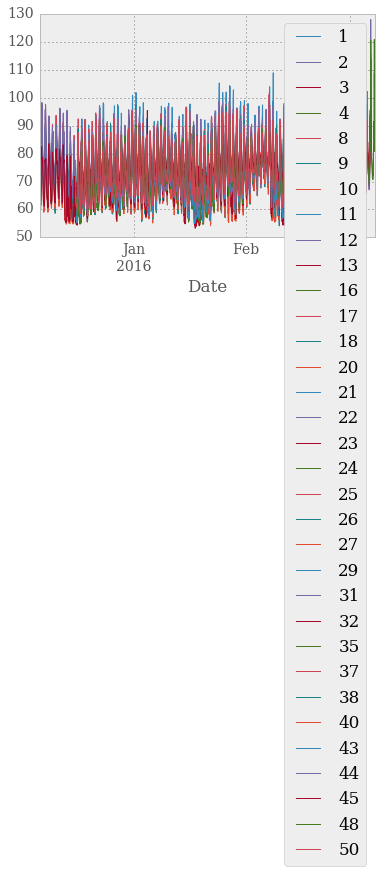

In [7]:
hi.plot()

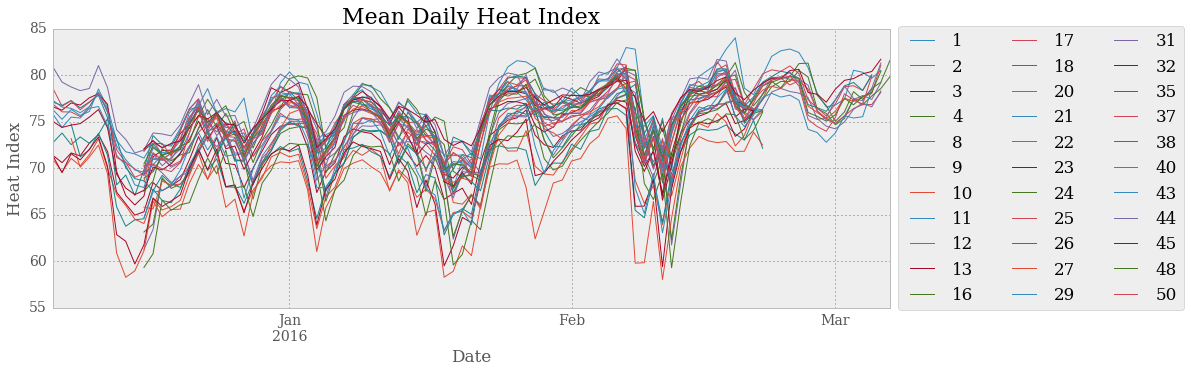

In [31]:
hi.resample('D').mean().plot(figsize= [15,5])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3,)
plt.title('Mean Daily Heat Index')
plt.ylabel('Heat Index')

In [1]:
tempDF.resample('D').mean().plot(figsize= [15,5])
plt.fill_between(tempDF.index, 18,20, color = 'lightgray', alpha = .5)
#plt.fill_between(18,20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3,)


NameError: name 'tempDF' is not defined

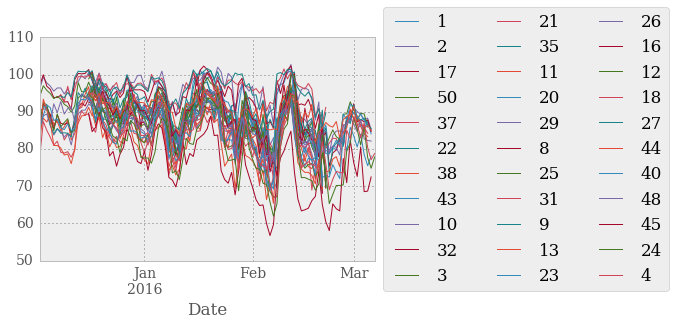

In [25]:
rhDF.resample('D').max().plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3,)